/var/folders/n8/pd7j7g0j3673x8rwthf6b1dh0000gn/T/ipykernel_31912/1717713179.py:6: DtypeWarning: Columns (0,1,5,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ETDs_sept23.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544592 entries, 0 to 544591
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      544583 non-null  object 
 1   id              544120 non-null  object 
 2   title           544089 non-null  object 
 3   author          544009 non-null  object 
 4   advisor         424034 non-null  object 
 5   year            477127 non-null  object 
 6   abstract        443570 non-null  object 
 7   university      534024 non-null  object 
 8   degree          427596 non-null  object 
 9   URI             542715 non-null  object 
 10  department      298718 non-null  object 
 11  discipline      376499 non-null  object 
 12  language        499467 non-null  object 
 13  schooltype      458032 non-null  object 
 14  oadsclassifier  544105 non-null  float64
 15  borndigital     544105 non-null  float64
dtypes: float64(2), object(14)
memory usage: 66.5+ MB
None
  

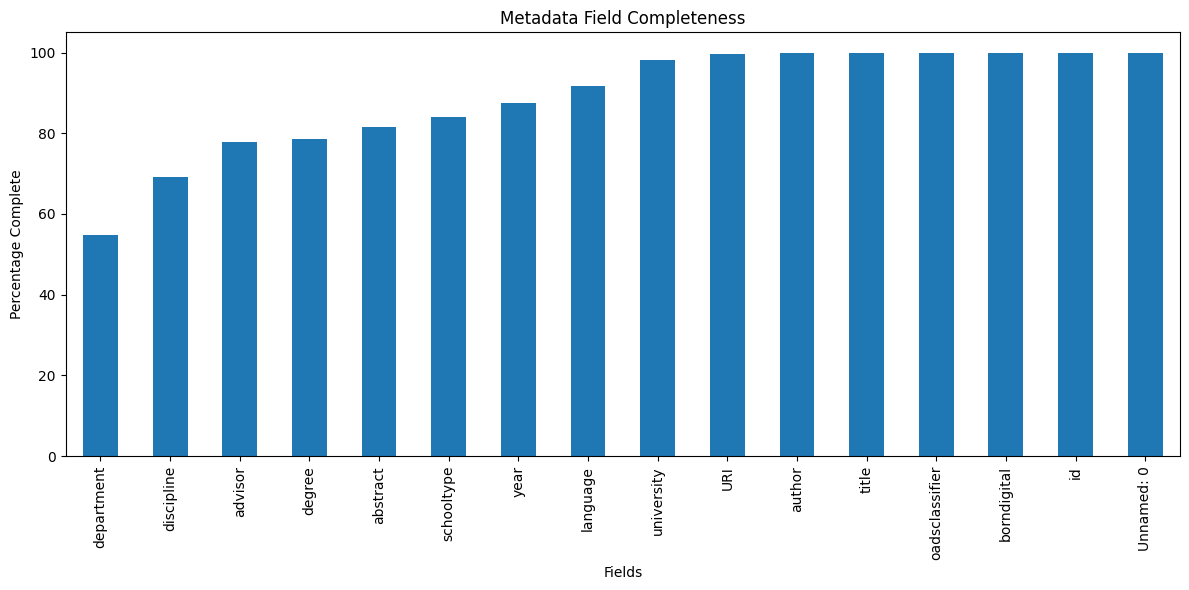


Summary Statistics:
       oadsclassifier    borndigital
count   544105.000000  544105.000000
mean         0.051894       0.266699
std          0.221814       0.442234
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%          0.000000       1.000000
max          1.000000       1.000000


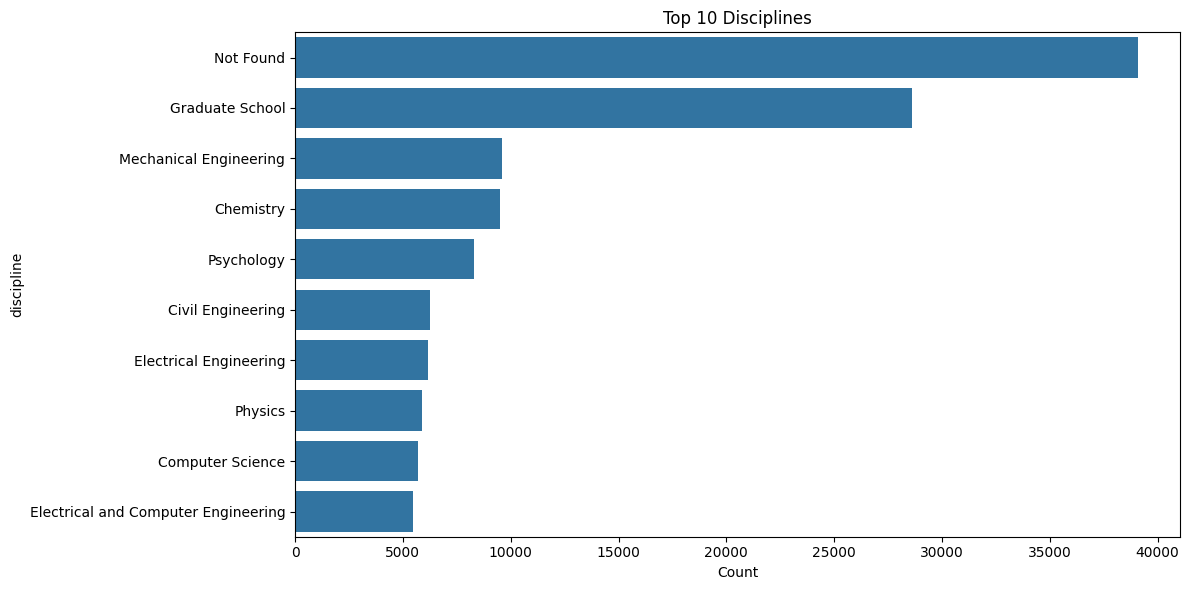

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
###
# Load the data
df = pd.read_csv('ETDs_sept23.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Calculate metadata completeness
completeness = (df.count() / len(df)) * 100

# Visualize completeness
plt.figure(figsize=(12, 6))
completeness.sort_values().plot(kind='bar')
plt.title('Metadata Field Completeness')
plt.ylabel('Percentage Complete')
plt.xlabel('Fields')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# If you have a 'submission_date' column, let's analyze submission trends
if 'submission_date' in df.columns:
    df['submission_date'] = pd.to_datetime(df['submission_date'])
    df['submission_year'] = df['submission_date'].dt.year
    
    yearly_submissions = df['submission_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    yearly_submissions.plot(kind='line', marker='o')
    plt.title('Number of ETD Submissions by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Submissions')
    plt.grid(True)
    plt.show()

# If you have a 'subject' or 'discipline' column, let's analyze subject distribution
subject_column = next((col for col in df.columns if col.lower() in ['subject', 'discipline']), None)
if subject_column:
    top_subjects = df[subject_column].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_subjects.values, y=top_subjects.index)
    plt.title(f'Top 10 {subject_column.capitalize()}s')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
